William Hartog
March 2021
Senior Thesis Code

In this file I code implementations of basis pursuit and orthogonal matching pursuit and compare them.

I also code a comparison of basis pursuit using various types of measurement matrix.

Note that the code on the whole takes a while to run, which is a result of my poor programming ability. There are also a number of warning

Basis Pursuit Implementation using Scipy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

# linear programming for basis pursuit
from scipy.optimize import linprog

# noise free reconstruction
from sklearn.linear_model import OrthogonalMatchingPursuit

# for plotting pdfs
import scipy.stats as stats

In [ ]:
def P1solve(A, y):
  # A is m x N matrix
  N = A.shape[1]
  m = A.shape[0]
  # c vector to get correct condition
  c = np.hstack([np.zeros(N),np.ones(N)])
  A_eq = np.hstack((A,np.zeros((m, N))))
  A_ub = np.vstack([np.hstack([np.identity(N),-np.identity(N)]),np.hstack([-np.identity(N),-np.identity(N)])])
  xt_ = linprog(c, A_ub = A_ub, b_ub = np.zeros(2*N), A_eq = A_eq, b_eq = y).x
  x_ = xt_[:N]
  return x_

https://math.stackexchange.com/questions/1639716/how-can-l-1-norm-minimization-with-linear-equality-constraints-basis-pu

Orthogonal Matching Pursuit

https://scikit-learn.org/stable/auto_examples/linear_model/plot_omp.html

In [ ]:
def omp_error(A, x, s):
  omp = OrthogonalMatchingPursuit(n_nonzero_coefs = s)
  omp.fit(A,np.matmul(A, x))
  x_ = omp.coef_
  return(np.linalg.norm(x - x_))

def bp_error(A, x):
  x_ = P1solve(A,np.matmul(A,x))
  return(np.linalg.norm(x - x_))

Comparison of Basis Pursuit and Orthogonal Matching Pursuit as Function of Sparsity

In [ ]:
# recovery rate graph
m = 50
N = 200

num_iter = 100

gaussians = [np.random.normal(0, 1/np.sqrt(m), size = (m,N)) for i in range(num_iter)]

# m subscript to denote m is constant

bp_rates_m = []
omp_rates_m = []

bp_times_m = []
omp_times_m = []

for s in range(1, m):
  indices = random.sample(range(N), s)
  x = np.zeros(N)
  for j in indices:
    x[j] = random.random()
  start = time.time()
  bp_rates_m.append(np.mean([bp_error(A, x) < 0.01 for A in gaussians]))
  end = time.time()
  bp_times_m.append(end - start)

  start = time.time()
  omp_rates_m.append(np.mean([omp_error(A, x, s) < 0.01 for A in gaussians]))
  end = time.time()
  omp_times_m.append(end - start)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

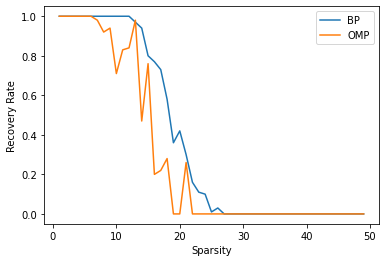

In [ ]:
plt.plot(range(1, m), bp_rates_m, label = 'BP')
plt.plot(range(1, m), omp_rates_m, label = 'OMP')
plt.xlabel('Sparsity')
plt.ylabel('Recovery Rate')
plt.legend()
plt.show()

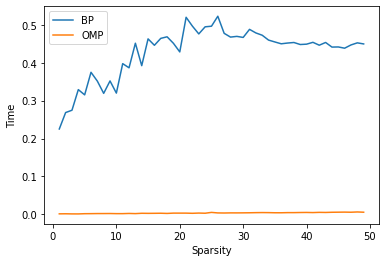

In [ ]:
plt.plot(range(1, m), [time / num_iter for time in bp_times_m], label = 'BP')
plt.plot(range(1, m), [time / num_iter for time in omp_times_m], label = 'OMP')
plt.xlabel('Sparsity')
plt.ylabel('Time')
plt.legend()
plt.show()

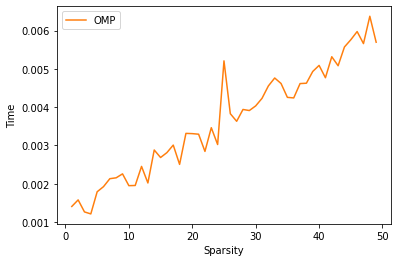

In [ ]:
# get the color I want
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

plt.plot(range(1, m), [time / num_iter for time in omp_times_m], label = 'OMP', color = colors[1])
plt.xlabel('Sparsity')
plt.ylabel('Time')
plt.legend()
plt.show()

Comparison of Basis Pursuit and Orthogonal Matching Pursuit as Function of Number of Measurements

In [ ]:
# plotting recovery rate 
s = 10
N = 200

num_iter = 100

# s subscript to denote s is constant

bp_rates_s = []
omp_rates_s = []

bp_times_s = []
omp_times_s = []

for m in range(20, 80):
  print(m)
  indices = random.sample(range(N), s)
  x = np.zeros(N)
  for j in indices:
    x[j] = random.random()

  gaussians = [np.random.normal(0, 1/np.sqrt(m), size = (m,N)) for i in range(num_iter)]
  
  start = time.time()
  bp_rates_s.append(np.mean([bp_error(A, x) < 0.01 for A in gaussians]))
  end = time.time()
  bp_times_s.append(end - start)

  start = time.time()
  omp_rates_s.append(np.mean([omp_error(A, x, s) < 0.01 for A in gaussians]))
  end = time.time()
  omp_times_s.append(end - start)

20


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


21


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


22


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


23


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


24


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


25


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


26


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

27


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

28


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

29


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

30


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

31


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

32


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

33


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

34


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

35


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

36


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

37


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

38


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

39


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

40


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

41


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

42


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

43


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

44


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

45


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

46


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

47


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

48


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

49


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

50


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

51


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

52


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

53


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

54


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

55


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

56


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

57


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

58


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

59


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

60


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

61


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

62


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

63


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

64


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

65


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

66


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

67


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

68


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

69


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

70


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

71


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

72


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

73


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

74


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

75


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

76


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

77


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

78


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

79


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting opt

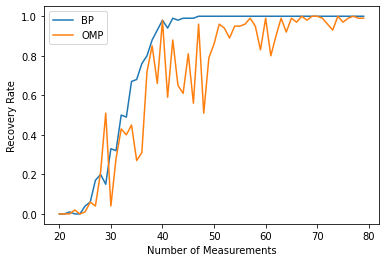

In [ ]:
plt.plot(range(20, 80), bp_rates_s, label = 'BP')
plt.plot(range(20, 80), omp_rates_s, label = 'OMP')
plt.xlabel('Number of Measurements')
plt.ylabel('Recovery Rate')
plt.legend()
plt.show()

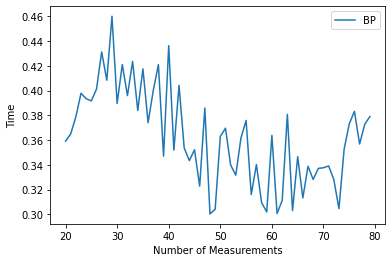

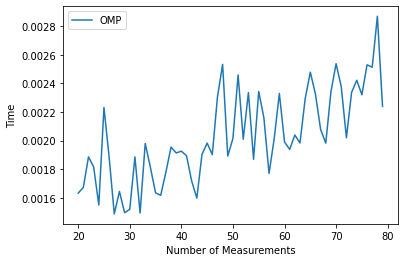

In [ ]:
plt.plot(range(20, 80), [time / num_iter for time in bp_times_s], label = 'BP')
plt.plot(range(20, 80), [time / num_iter for time in omp_times_s], label = 'OMP')
plt.xlabel('Number of Measurements')
plt.ylabel('Time')
plt.legend()
plt.show()

Comparison of Gaussian and Laplace Measurement Matrices for Basis Pursuit

In [ ]:
# plotting recovery rate 
s = 10
N = 200

num_iter = 100

gaussian_rates = []
laplace_rates = []
cauchy_rates = []

for m in range(20, 80):
  print(m)
  indices = random.sample(range(N), s)
  x = np.zeros(N)
  for j in indices:
    x[j] = random.random()

  # creating matrices
  gaussians = [np.random.normal(0, 1/np.sqrt(m), size = (m,N)) for i in range(num_iter)]
  laplaces = [np.random.laplace(0, 1/np.sqrt(m), size = (m,N)) for i in range(num_iter)]
  cauchys = [1 / np.sqrt(m) * np.random.standard_cauchy(size = (m,N)) for i in range(num_iter)]

  # computing recovery rates
  gaussian_rates.append(np.mean([bp_error(A, x) < 0.01 for A in gaussians]))
  laplace_rates.append(np.mean([bp_error(A, x) < 0.01 for A in laplaces]))
  cauchy_rates.append(np.mean([bp_error(A, x) < 0.01 for A in cauchys]))

20


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


21
22
23
24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.41249e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.09969e-20)

25
26


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.41412e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


27


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.49637e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.32399e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.72782e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.05537e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


28


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.48398e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.41249e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.39092e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.28893e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.9297e-21): result may not be accurate.
  re

29


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.5156e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.65323e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.85425e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.16449e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.90511e-20): result may not be accurate.
  re

30


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.30761e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.04962e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.77934e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.01397e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.14148e-21): result may not be accurate.
  r

31


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.45849e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.05156e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.15654e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.65974e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.41389e-20): result may not be accurate.
  r

32


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.1131e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.82419e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.55073e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.3974e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.06486e-20): result may not be accurate.
  ret

33


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.89164e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.19182e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.8591e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.60188e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.13858e-20): result may not be accurate.
  re

34


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.20356e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.80385e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.53186e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.21528e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.80266e-21): result may not be accurate.
  r

35


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.07416e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.98694e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.38358e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.41679e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.13004e-21): result may not be accurate.
  r

36


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.25448e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.48905e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.39468e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.32329e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.65184e-21): result may not be accurate.
  r

37


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.39208e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.10959e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.74459e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.90696e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.82258e-20): result may not be accurate.
  r

38


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.81524e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.94038e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.34685e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.68151e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.30589e-21): result may not be accurate.
  r

39


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.34952e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.08896e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.09132e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.76868e-23): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.42278e-21): result may not be accurate.
  r

40


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.71329e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.01925e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.86348e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.68418e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.18422e-21): result may not be accurate.
  r

41


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.47367e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.74399e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.88281e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.50717e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.97111e-21): result may not be accurate.
  r

42


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.88008e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.66952e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.29566e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.04293e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.08919e-20): result may not be accurate.
  r

43


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.15995e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.1385e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.64764e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.03056e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.22728e-21): result may not be accurate.
  re

44


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.90961e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.41291e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.98623e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.90752e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.78756e-21): result may not be accurate.
  r

45


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.88126e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.8463e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.4845e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.70769e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.02852e-20): result may not be accurate.
  ret

46


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.64696e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.08457e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.48504e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.55571e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.26148e-21): result may not be accurate.
  r

47


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.70499e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.32976e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.45905e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.62103e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.38768e-21): result may not be accurate.
  r

48


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.65099e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.4196e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.6256e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.07242e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.8389e-22): result may not be accurate.
  retu

49


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.22082e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.78601e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.18673e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.13935e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.50882e-21): result may not be accurate.
  r

50


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.21367e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.06513e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.75603e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.98716e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.17422e-20): result may not be accurate.
  r

51


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.20596e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.76778e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.08996e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.81481e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.12847e-21): result may not be accurate.
  r

52


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.1288e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.36311e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.26138e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.69621e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.36351e-21): result may not be accurate.
  re

53


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.44793e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.00783e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.25936e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.00622e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.12896e-21): result may not be accurate.
  r

54


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.27066e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.59048e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.25141e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.66873e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.49868e-21): result may not be accurate.
  r

55


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.84413e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.05726e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.48257e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.57426e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.68626e-22): result may not be accurate.
  r

56


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.37056e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.25178e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.02071e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.25825e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.13108e-21): result may not be accurate.
  r

57


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.0615e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.87423e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.32834e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.5033e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.26266e-22): result may not be accurate.
  ret

58


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.20263e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.29459e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.11766e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.39302e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.77631e-20): result may not be accurate.
  r

59


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.54991e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.49749e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.02149e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.16758e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.67842e-21): result may not be accurate.
  r

60


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.95938e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.20213e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.94293e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.3123e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.42022e-20): result may not be accurate.
  re

61


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.0848e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.15263e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.1755e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.3237e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.83689e-21): result may not be accurate.
  retu

62


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.33874e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.15688e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.12654e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.86925e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.71944e-21): result may not be accurate.
  r

63


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.17878e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.70676e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.53649e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.32798e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.31375e-21): result may not be accurate.
  r

64


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.43146e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.03831e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.62553e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.3112e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.5565e-21): result may not be accurate.
  ret

65


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.47052e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.1143e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.8025e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.00301e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.26361e-20): result may not be accurate.
  ret

66


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.28846e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.20303e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.13765e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.91417e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.2999e-21): result may not be accurate.
  re

67


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.52539e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.43378e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.24801e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.11801e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.18598e-21): result may not be accurate.
  r

68


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.50154e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.92113e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.18395e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.23864e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.76142e-22): result may not be accurate.
  r

69


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.04553e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.41019e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.09049e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.61269e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.60943e-21): result may not be accurate.
  r

70


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.55434e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.44528e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.78229e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.95227e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.50305e-21): result may not be accurate.
  r

71


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.32321e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.61215e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.27871e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.75075e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.45619e-23): result may not be accurate.
  r

72


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.79386e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.15658e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.43001e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.00474e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.10487e-20): result may not be accurate.
  r

73


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.31142e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.2912e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.26692e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.39742e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.54941e-21): result may not be accurate.
  re

74


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.16143e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.4054e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.99812e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.49401e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.93121e-21): result may not be accurate.
  re

75


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.74067e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.40293e-23): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.52616e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.05493e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.13891e-21): result may not be accurate.
  r

76


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.89319e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.21986e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.61762e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.18459e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.02122e-22): result may not be accurate.
  r

77


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.205e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.50316e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.29182e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.83556e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.46358e-20): result may not be accurate.
  ret

78


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.22429e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.9884e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.67673e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.89966e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.2797e-22): result may not be accurate.
  ret

79


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.13299e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.11467e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.14807e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.74167e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.01668e-22): result may not be accurate.
  r

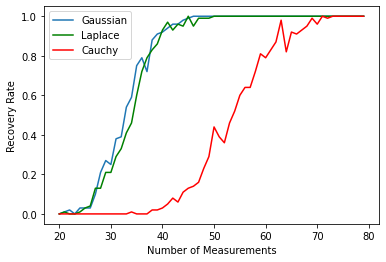

In [ ]:
plt.plot(range(20, 80), gaussian_rates, label = 'Gaussian')
plt.plot(range(20, 80), laplace_rates, label = 'Laplace', color = 'green')
plt.plot(range(20, 80), cauchy_rates, label = 'Cauchy', color = 'red')
plt.xlabel('Number of Measurements')
plt.ylabel('Recovery Rate')
plt.legend()
plt.show()

In [ ]:
 def deterministic_matrix(m, N):
   A = np.zeros((m, N))
   for i in range(m):
     for j in range(N):
       A[i][j] = i + j % (i + 2)
   return A

In [ ]:
# plotting error for one gaussian matrix vs deterministic matrix, multiple vectors
s = 10
N = 100

num_iter = 50

gaussian_rates_2 = []
det_rates = []

for m in range(1, 50):
  print(m)
  indices = random.sample(range(N), s)
  x = np.zeros(N)
  for j in indices:
    x[j] = random.random()

  A_g = np.random.normal(0, 1/np.sqrt(m), size = (m,N))
  A_d = 1 / np.sqrt(m) * deterministic_matrix(m,N)

  signals = []
  for i in range(num_iter):
    indices = random.sample(range(N), s)
    x = np.zeros(N)
    for j in indices:
      x[j] = random.random()
    signals.append(x)
  
  gaussian_rates_2.append(np.mean([bp_error(A_g, x) < 0.01 for x in signals]))
  det_rates.append(np.mean([bp_error(A_d, x) < 0.01 for x in signals]))

1


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


2
3
4
5
6
7
8
9
10
11
12
13
14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.89224e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


15
16


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.85082e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


17
18


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.78749e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.10856e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.70712e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


19


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.26394e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.88035e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


20


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.59409e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


21


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.45658e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.63034e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.12037e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.58171e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.22191e-21): result may not be accurate.
  r

22


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.20539e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.14499e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.99444e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.6893e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.33106e-22): result may not be accurate.
  re

23


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.58856e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.2166e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.89421e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.40977e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.57223e-20): result may not be accurate.
  re

24


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.58079e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.26775e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.80477e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.4663e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.19251e-20): result may not be accurate.
  re

25


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.6151e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.30668e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.63739e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.01635e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.43622e-20): result may not be accurate.
  re

26


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.18399e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.77411e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.14549e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.53097e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.66041e-21): result may not be accurate.
  r

27


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.44514e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.01461e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.17367e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.30152e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.51202e-19): result may not be accurate.
  r

28


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.80263e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.75714e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.29415e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.69868e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.8902e-21): result may not be accurate.
  re

29


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.37919e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.32644e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.07239e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.43025e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.78253e-19): result may not be accurate.
  r

30


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.96257e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.75799e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.36791e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.98186e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.01221e-20): result may not be accurate.
  r

31


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.47824e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.48491e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.11559e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.83402e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.05681e-20): result may not be accurate.
  r

32


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.57327e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.0368e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.98398e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.39109e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.33616e-19): result may not be accurate.
  re

33


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.68616e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.48116e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.55448e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.51859e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.97388e-20): result may not be accurate.
  r

34


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.68162e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.00501e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.52294e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.26374e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.287e-20): result may not be accurate.
  ret

35


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.45999e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.26343e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.85141e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.94125e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.06246e-20): result may not be accurate.
  r

36


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.11885e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.39524e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.06848e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.08463e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.27704e-21): result may not be accurate.
  r

37


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.91246e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.3008e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.02242e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.18174e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.38684e-21): result may not be accurate.
  re

38


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.66536e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.63215e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.79589e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.66177e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.52764e-21): result may not be accurate.
  r

39


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.39506e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.84867e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.90495e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.34847e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.50166e-21): result may not be accurate.
  r

40


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.83088e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.51592e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.77126e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.21892e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.39315e-20): result may not be accurate.
  r

41


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.23915e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.51485e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.11218e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.30608e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.58526e-20): result may not be accurate.
  r

42


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.96868e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.68174e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.07869e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.33579e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.32363e-20): result may not be accurate.
  r

43


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.85515e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.70433e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.12789e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.14715e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.4774e-21): result may not be accurate.
  re

44


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.22842e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.90053e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.5183e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.10908e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.35443e-22): result may not be accurate.
  re

45


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.76457e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.11151e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.23648e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.02985e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.48351e-19): result may not be accurate.
  r

46


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.8468e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.76081e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.02272e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.90175e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.64861e-21): result may not be accurate.
  re

47


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.10385e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.98964e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=7.88097e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.11226e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.68144e-20): result may not be accurate.
  r

48


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.31489e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.22338e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=4.08168e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=6.67749e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.84368e-20): result may not be accurate.
  r

49


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=9.31102e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=8.59696e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.36931e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=5.19559e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.35647e-21): result may not be accurate.
  r

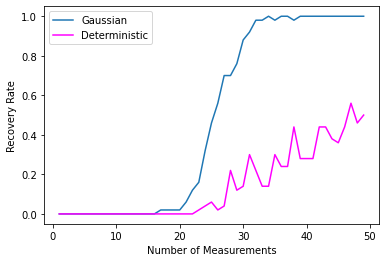

In [ ]:
plt.plot(range(1, 50), gaussian_rates_2, label = 'Gaussian')
plt.plot(range(1, 50), det_rates, label = 'Deterministic', color = 'magenta')
plt.xlabel('Number of Measurements')
plt.ylabel('Recovery Rate')
plt.legend()
plt.show()

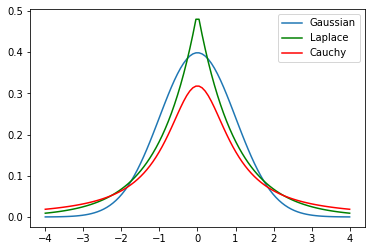

In [ ]:
# plotting Gaussian, Laplace, Cauchy pdfs
x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x), label = 'Gaussian')
plt.plot(x, stats.laplace.pdf(x), label = 'Laplace', color = 'green')
plt.plot(x, stats.cauchy.pdf(x), label = 'Cauchy', color = 'red')
plt.legend()
plt.show()